# STUDIO DELL'ANDAMENTO DELL'ONDA

L'onda instaurata decresce all'aumentare della distanza tra emettitore e ricevitore. Presenta inoltre un'andamento oscillatorio dovuto alla presenza dell'onda stazionaria. Per campionare i valori sono state misurate le tensioni ai picchi di massimo e minimo variando la posizione del ricevitore

In [33]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import sys

dir_path = os.path.abspath('')
sys.path.append(dir_path + '/../')

from mylib import Interpolazione, final_val

dir_path = os.path.abspath('')
FILE = dir_path + '/data/' + 'ampiezza_distanza.csv'
fr = pd.read_csv(FILE)

In [34]:
dMAX = np.abs(np.array(fr['Ricevitore MAX (piede) (cm)']) - np.array(fr['Emettitore (piede) (cm)'])) * 0.01
sigmaD1 = np.sqrt(2) * 0.001 * np.ones_like(dMAX) # 2mm per entrambi i bracci

Vmax = np.array(fr['Vmax (Volt)'])
sigmaVmax = np.array(fr['sigmaVmax']) * 2
print(sigmaVmax)

[0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.02 0.04 0.02 0.04
 0.04 0.04 0.04 0.04]


# GRUPPO DI CONTROLLO

sono state raccolte ulteriori misure dei valori di picco spazzando distanze maggiori

In [35]:
# maxControllo = np.array(fr['MAX (cm) controllo'])[0:7]
VmaxControllo = np.array(fr['Vmax (volt) controllo'])[0:7]
sigmaVmaxControllo = np.array(fr['sigmaVmax controllo'])[0:7] * 2

dcontrollo = np.abs(np.array(fr['MAX (cm) controllo'])[0:7] - np.array(fr['Emettitore controllo'])[0:7]) * 0.01
sigmaD2 = np.sqrt(2) * 0.001 * np.ones_like(dcontrollo) # 2mm per entrambi i bracci

### COLLEZIONE DATI

qui concateno tutti i dati raccolti

In [36]:
V = np.concatenate((Vmax, VmaxControllo))
sigmaV = np.concatenate((sigmaVmax, sigmaVmaxControllo))
d = np.concatenate((dMAX, dcontrollo))
sigmaD = np.concatenate((sigmaD1, sigmaD2))

$V(r) = \frac{a}{r} + b$

In [37]:
unosur = lambda r,a,b: a/r + b # andamento 1/r

fit = Interpolazione(d, V, sigmaV, sigmaD, unosur, [1,1], ['a','b'])
print(fit)

----------------- VALORI FIT: -----------------
a: 1.672 ± 0.012 
b: (-1.268 ± 0.245)e-1 

dof: 23
chi2: 126.66
chi2 ridotto: 5.51
------------------------------------------------



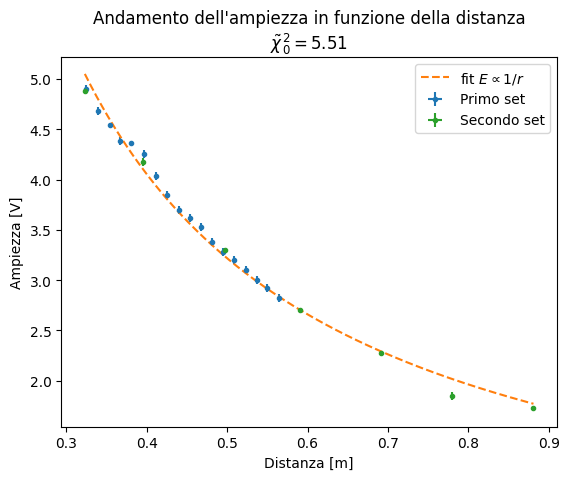

In [38]:
plt.errorbar(dMAX, Vmax, yerr=sigmaVmax, xerr=sigmaD[0], fmt= '.', label='Primo set')

plt.plot(*fit.draw(),'--', label='fit $E \propto 1/r$')

plt.errorbar(dcontrollo, VmaxControllo, yerr=sigmaVmaxControllo, xerr=sigmaD2, fmt='.', label='Secondo set') # gruppo controllo)

plt.title('Andamento dell\'ampiezza in funzione della distanza\n' + f'$\\tilde\chi_0^2 = {fit.rchi2}$')
plt.xlabel('Distanza [m]')
plt.ylabel('Ampiezza [V]')
plt.legend()
plt.show()